In [1]:
from datetime import datetime

import autograd.numpy as np
import capytaine as cpy
import matplotlib.pyplot as plt
from scipy.optimize import brute

import wecopttool as wot
import xarray as xr

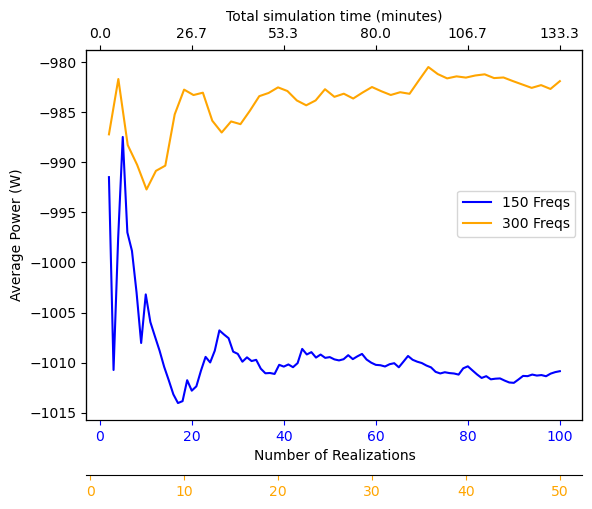

In [2]:
# load results

res_ds_150 = xr.load_dataset('pioneer_power_convergence_150.nc')

f1_150 = 1.875/150

res_ds_300 = xr.load_dataset('pioneer_power_convergence_300.nc')

f1_300 = 1.875/300

rolling_mean_150 = []

for ind in range(len(res_ds_150['power'])):

    rolling_mean_150.append(np.mean(res_ds_150['power'][0:ind]))
    
realization_number_150 = range(1,len(res_ds_150['power'])+1)

rolling_mean_300 = []

for ind in range(len(res_ds_300['power'])):

    rolling_mean_300.append(np.mean(res_ds_300['power'][0:ind]))
    
realization_number_300 = range(1,len(res_ds_300['power'])+1)
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax1.plot(realization_number_150,rolling_mean_150, label='150 Freqs', color = 'blue')
ax1.set_xlabel('Number of Realizations')
ax1.set_ylabel('Average Power (W)')
ax1.tick_params(axis='x', colors='blue')

ax2.plot(realization_number_300,rolling_mean_300, label='300 Freqs', color = 'orange')
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax2.spines["bottom"].set_position(("axes", -0.15))
ax2.tick_params(axis='x', colors='orange')

# also plot total time
tperreal = 1/f1_150

def tick_function(X):
    V = tperreal*X/60
    return ["%.1f" % z for z in V]

ax3.set_xticks(ax1.get_xticks())
ax3.set_xbound(ax1.get_xbound())
ax3.set_xticklabels(tick_function(ax1.get_xticks()))
ax3.set_xlabel('Total simulation time (minutes)')

fig.legend(bbox_to_anchor=(0, 0.5, .9, .102))

Text(0.5, 0, 'Total simulation time (minutes)')

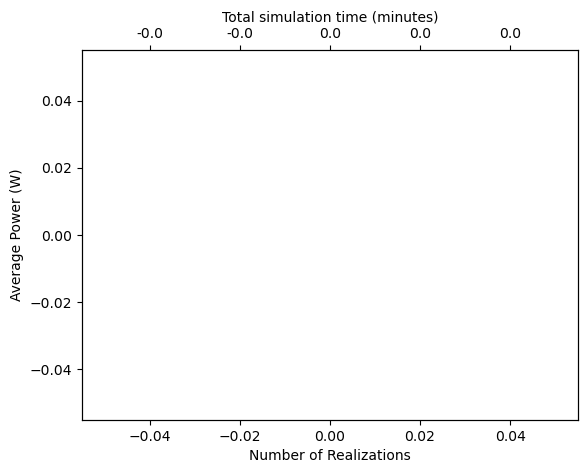

In [4]:
# load results

res_ds = xr.load_dataset('lupa_power_convergence.nc')

rolling_mean = []

for ind in range(len(res_ds['power'])):

    rolling_mean.append(np.mean(res_ds['power'][0:ind]))
    
realization_number = range(1,len(res_ds['power'])+1)    

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(realization_number,rolling_mean)
ax1.set_xlabel('Number of Realizations')
ax1.set_ylabel('Average Power (W)')

# also plot total time
tperreal = 1/.02

def tick_function(X):
    V = tperreal*X/60
    return ["%.1f" % z for z in V]

ax2.set_xticks(ax1.get_xticks())
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(tick_function(ax1.get_xticks()))
ax2.set_xlabel('Total simulation time (minutes)')

[90.0, 45.0, 30.0, 22.0, 18.0, 15.0]


C:\Users\jtgrasb\AppData\Local\Temp\ipykernel_11532\1970242799.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  V = [(1/(fend/nfreq)) for nfreq in X]


Text(0, 0.5, 'Max Theoretical Power Total')

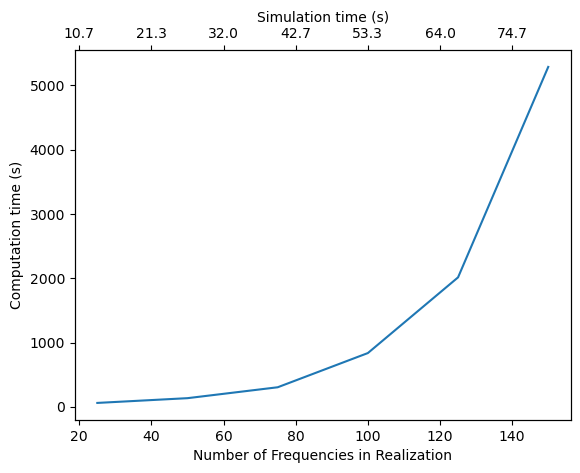

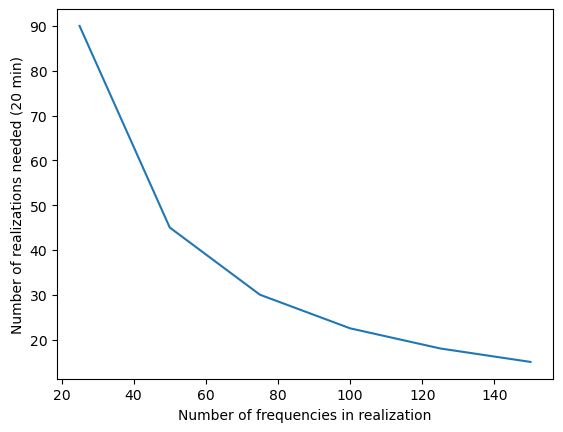

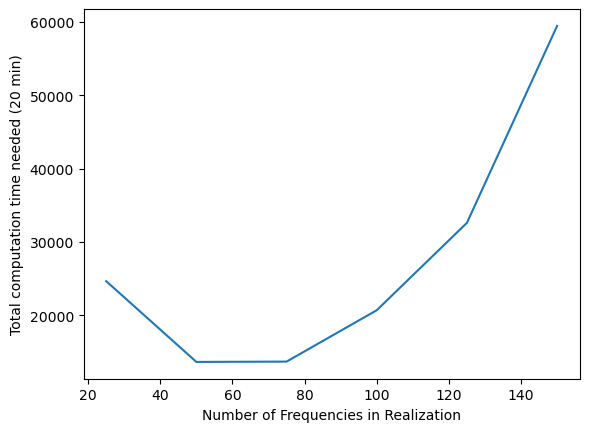

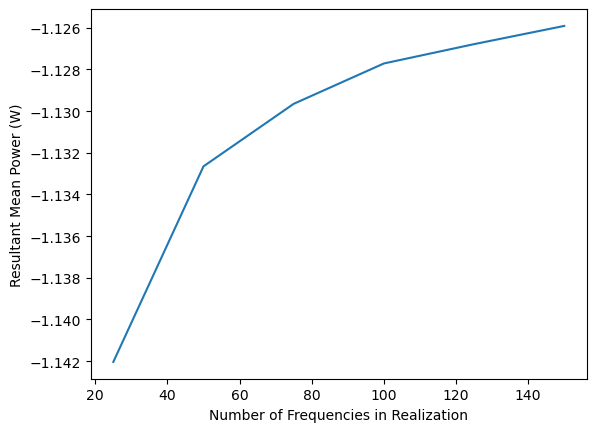

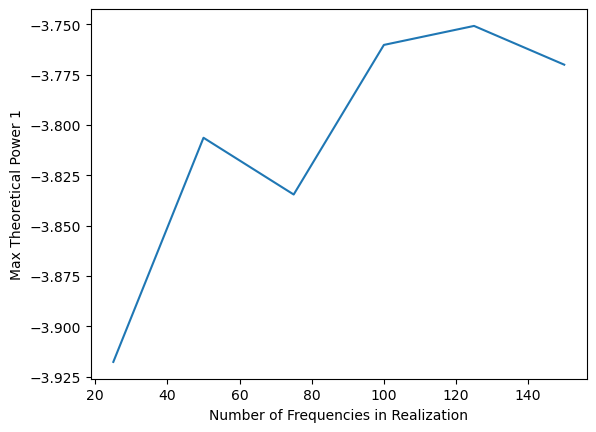

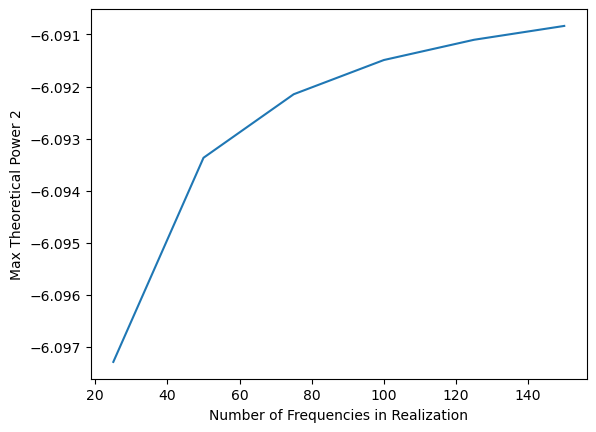

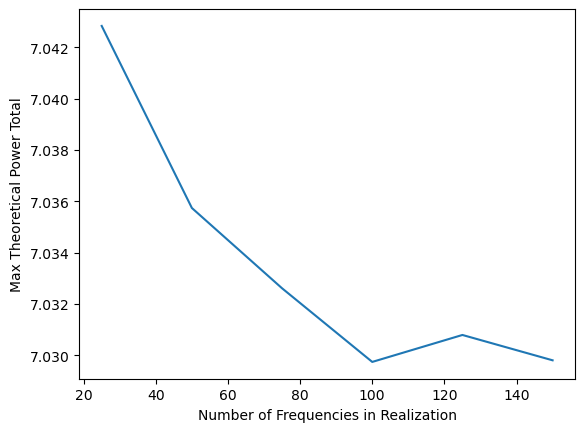

In [5]:
import xarray as xr
nfreqs = np.linspace(25,150,6)
fend = 1.875
minutes_needed = 20

res_ds = xr.load_dataset('LUPA_freq_time.nc')

#print(res_ds)

runtime = res_ds['time'].values
meanpower = res_ds['power'].values
maxpower1 = res_ds['pmax1'].values
maxpower2 = res_ds['pmax2'].values
maxpowerTot = res_ds['pmaxTot'].values

nrealizations_needed = [np.round(minutes_needed*60*(fend/nfreq)) for nfreq in nfreqs]

print(nrealizations_needed)

# Plot the computation time vs. number of frequencies

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(nfreqs,runtime/nrealizations_needed)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Computation time (s)')

# also plot total time
tperreal = 1/.02

def tick_function(X):
    V = [(1/(fend/nfreq)) for nfreq in X]
    return ["%.1f" % z for z in V]

ax2.set_xticks(ax1.get_xticks())
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(tick_function(ax1.get_xticks()))
ax2.set_xlabel('Simulation time (s)')

# plot total simulation time for each number of frequencies

sim_times = [(1/(fend/nfreq)) for nfreq in nfreqs]

nrealizations_needed = [minutes_needed*60/sim_time for sim_time in sim_times]

#print(nrealizations_needed.type())
total_times = [a*b for a, b in zip(nrealizations_needed,runtime/20)]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,nrealizations_needed)
ax1.set_xlabel('Number of frequencies in realization')
ax1.set_ylabel('Number of realizations needed (20 min)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,total_times)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Total computation time needed (20 min)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,meanpower)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Resultant Mean Power (W)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,maxpower1)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Max Theoretical Power 1')
#ax1.set_ylim([-53100, -53050])

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,maxpower2)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Max Theoretical Power 2')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,maxpowerTot)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Max Theoretical Power Total')

[45.0, 30.0, 22.0, 18.0, 15.0, 13.0, 11.0, 10.0, 9.0, 8.0, 8.0]


C:\Users\jtgrasb\AppData\Local\Temp\ipykernel_23508\224138861.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  V = [(1/(fend/nfreq)) for nfreq in X]


Text(0, 0.5, 'Mean Power Error (W)')

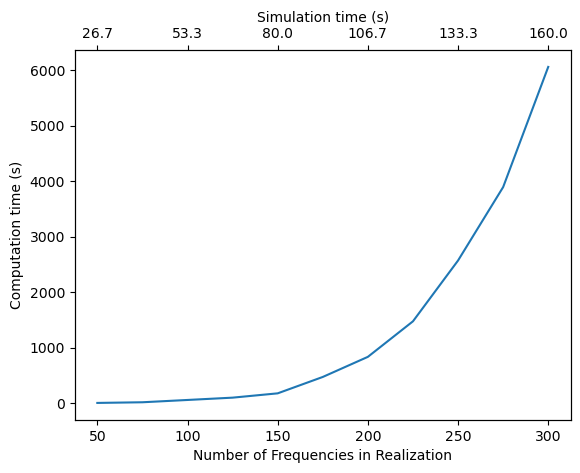

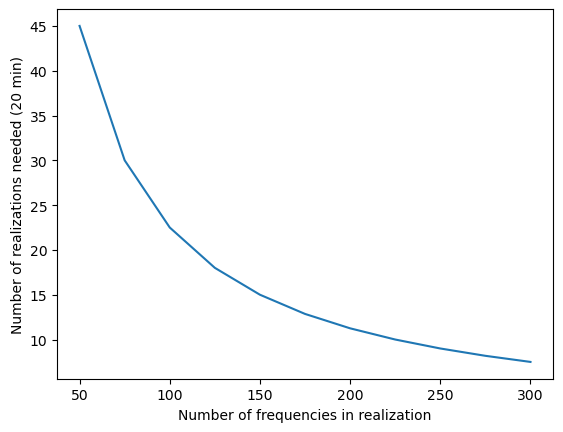

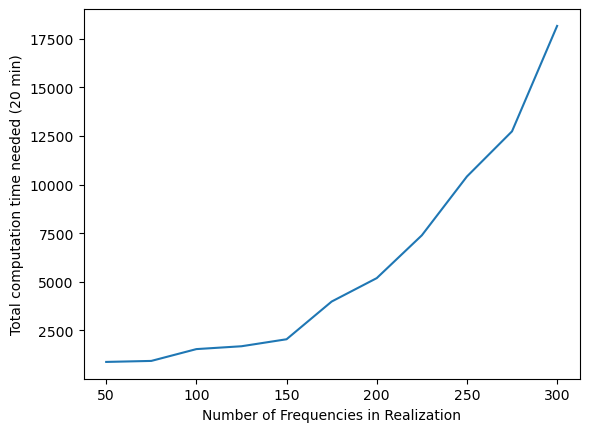

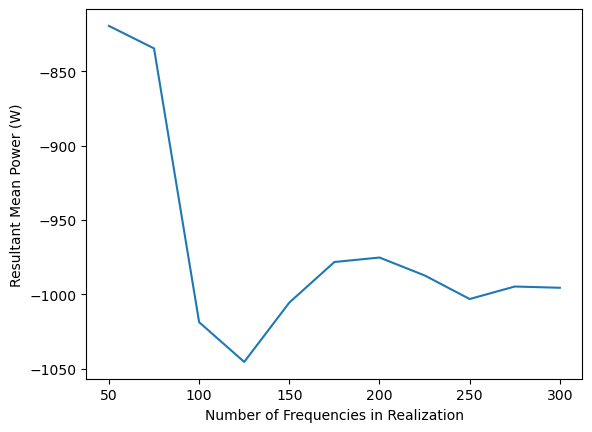

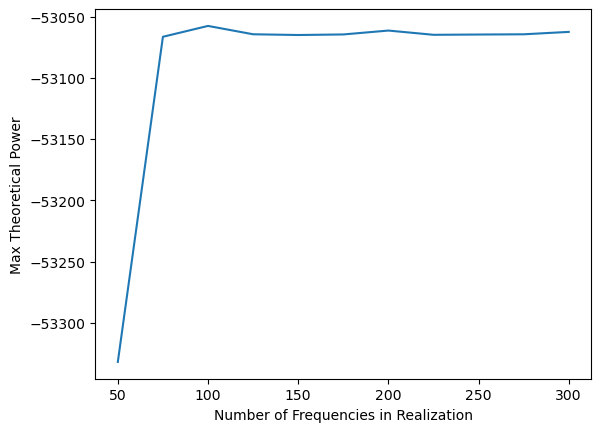

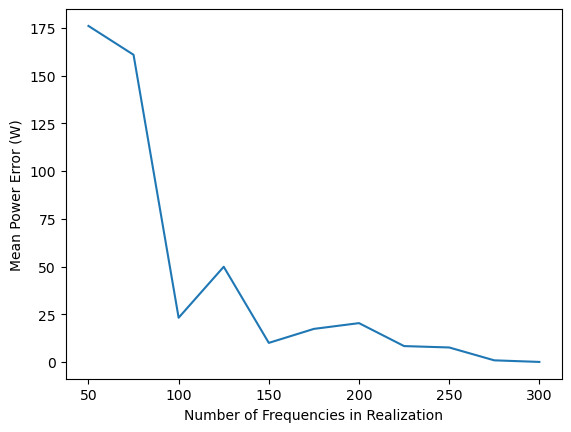

In [15]:
import xarray as xr
nfreqs = np.linspace(50,300,11)
#nfreqs = [30,60,120,240]
fend = 1.875
minutes_needed = 20

# average power 300 freqs
mean_power_actual = -995.60298198

res_ds = xr.load_dataset('pioneer_freq_time.nc')

#print(res_ds)

runtime = res_ds['time'].values
meanpower = res_ds['power'].values
maxpower = res_ds['pmax'].values

nrealizations_needed = [np.round(minutes_needed*60*(fend/nfreq)) for nfreq in nfreqs]

print(nrealizations_needed)

# Plot the computation time vs. number of frequencies

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(nfreqs,runtime/nrealizations_needed)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Computation time (s)')

# also plot total time
tperreal = 1/.02

def tick_function(X):
    V = [(1/(fend/nfreq)) for nfreq in X]
    return ["%.1f" % z for z in V]

ax2.set_xticks(ax1.get_xticks())
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(tick_function(ax1.get_xticks()))
ax2.set_xlabel('Simulation time (s)')

# plot total simulation time for each number of frequencies

sim_times = [(1/(fend/nfreq)) for nfreq in nfreqs]

nrealizations_needed = [minutes_needed*60/sim_time for sim_time in sim_times]

#print(nrealizations_needed.type())
total_times = [a*b for a, b in zip(nrealizations_needed,runtime/20)]

error_power = abs(meanpower - meanpower[-1])

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,nrealizations_needed)
ax1.set_xlabel('Number of frequencies in realization')
ax1.set_ylabel('Number of realizations needed (20 min)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,total_times)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Total computation time needed (20 min)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,meanpower)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Resultant Mean Power (W)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,maxpower)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Max Theoretical Power')
#ax1.set_ylim([-53100, -53050])

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nfreqs,error_power)
ax1.set_xlabel('Number of Frequencies in Realization')
ax1.set_ylabel('Mean Power Error (W)')



In [17]:
# richardson extrapolation for actual mean power

def rich_extrap(vals,r):
    p = np.log((vals[0] - vals[1])/(vals[1] - vals[2]))/np.log(r)
    actual_val = vals[2] - ((vals[1]-vals[2])/(r**p - 1))
    return actual_val

# for set of 11 nfreqs
doubles1 = [meanpower[0],meanpower[2],meanpower[6]]
doubles2 = [meanpower[1],meanpower[4],meanpower[10]]

#actual_power = rich_extrap(meanpower[1:],2)
actual_power = rich_extrap(doubles2,2)
print(actual_power)

nan


In [ ]:
print(meanpower)

ds = xr.Dataset(data_vars=dict(
    power=('nfreqs', meanpower),
    comp_time=('nfreqs', runtime),
    realizations=('nfreqs', nrealizations_needed),
    pmax_absorbable=('nfreqs', maxpower)),
    coords=dict(
    nfreqs=nfreqs,
    fend = fend)
)

#ds = wot.read_netcdf(os.path.join(os.getcwd(), 'data', 'tutorial_4_nfreqs.nc'))

print(ds)

#wot.write_netcdf(os.path.join(os.getcwd(), 'data', 'tutorial_4_nfreqs.nc'), ds)

<xarray.Dataset>
Dimensions:  (ind: 200, ind2: 400)
Coordinates:
  * ind      (ind) int32 0 1 2 3 4 5 6 7 8 ... 192 193 194 195 196 197 198 199
  * ind2     (ind2) int32 0 1 2 3 4 5 6 7 8 ... 392 393 394 395 396 397 398 399
Data variables:
    power    (ind) float64 -38.12 -37.08 -36.89 -38.17 ... -37.45 -37.95 -38.32
    x        (ind, ind2) float64 -0.0001458 0.0001395 ... -5.807 -2.257


Text(0.5, 0, 'Total simulation time (minutes)')

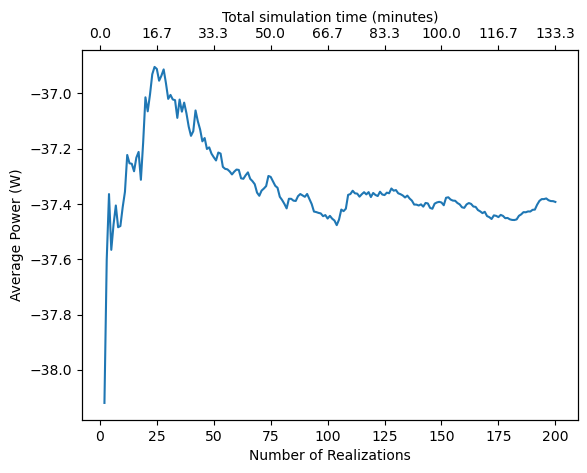

In [2]:
# load results
import xarray as xr
res_ds = xr.load_dataset('wavebot_power_convergence_025.nc')

print(res_ds)

rolling_mean = []

for ind in range(len(res_ds['power'])):

    rolling_mean.append(np.mean(res_ds['power'][0:ind]))
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(range(1,len(res_ds['power'])+1),rolling_mean)
ax1.set_xlabel('Number of Realizations')
ax1.set_ylabel('Average Power (W)')
#ax1.xlim([200, 400])
#ax1.ylim([-39.3,-39.0])
    
# also plot total time
tperreal = 1/.025

def tick_function(X):
    V = tperreal*X/60
    return ["%.1f" % z for z in V]

ax2.set_xticks(ax1.get_xticks())
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(tick_function(ax1.get_xticks()))
ax2.set_xlabel('Total simulation time (minutes)')
    
